**Espectro de Galáxias da Amostra Spitzer/ATLAS**

In [49]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [50]:
#### INPUT

# Change the files directory if necessary
# destiny --> local where results will be saved
# Change the files name if necessary
 
# directory of the sources
source = 'C:/Users/User98/Desktop/python/ATLAS/Amostra_Filtrada_DAT/'
sources = source + '*_z.dat' # final designation of the sources
    
#colocar * para pegar todas que tenham o final Z e vão ler só o .dat"

In [51]:
# directory to save the plots
destiny = ''
  
# path of the ATLAS template
med_spectrum = 'C:/Users/User98/Desktop/python/ATLAS/MIR_SB.dat'


In [52]:
# name of the final image\n",
img_name = 'all_spectra_SB'
 
# title of the plot
title_plot = 'MIR_SB subsample'

In [53]:
# range of the x and y axis  [xmin, xmax, ymin, ymax]
limits_plot = [5, 15, -1, 20]

In [35]:
# Creating a list with the objects from the chosen path
S = np.array(glob.glob(sources), dtype='U')
S.sort()

#alinhar todas as amostras com z no final e alinhar alfabética"

In [54]:
#### Loading the sample's template spectrum
#abrir template do ATLAS, vai verificar comprimento de onda, fluxo e erro do fluxo

# w = wavelength, f = flux, ferr = flux error
w, f, fe = np.loadtxt(med_spectrum, unpack=True, usecols=[0,1,2])
 
# Selecting the flux at 7um to perform the normalization
# (normalização do espectro)

w_2 = w[w>=7]  # w_2[0] is the first wavelength >= 7um
#lista com a partir de 7um

i2 = np.where(w == w_2[0]) # i2 is the index of w_2[0] in the total spectrum
#indice do primeiro valor minimo da amostra original, onde trem 7um  

f7 = f[i2] # f7 is the flux at 7um
#posição do fluco que me dá valor igual a 7um


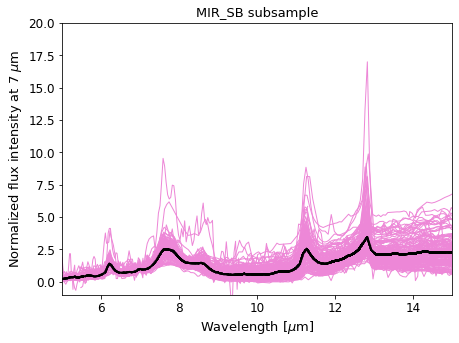

In [62]:
#### Loading the observational data and plotting

# Plot parameters #tamanhos dos eixos da fonte
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=13)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels\n",
plt.rc('figure', titlesize=12)  # fontsize of the figure title\n",
plt.rc('legend', fontsize=8)  # fontsize of the legend\n",

fig = plt.figure(figsize=(7,5))

plt.title(title_plot)
plt.xlabel(r'Wavelength [$\mu$m]')
plt.ylabel(r'Normalized flux intensity at 7 $\mu$m')
plt.axis(limits_plot)

# Plotting each spectrum of the sample normalized at 7 um
# (same procedure performed with the template spectrum)

for i, j in enumerate(S):

    wavel, flux, ferr = np.loadtxt(j, unpack=True)
    
    wave_2 = wavel[wavel>=7]
    
    idx = np.where(wavel == wave_2[0])
    
    flux7 = flux[idx]

    # Plot the normalized spectrum        
    plt.plot(wavel, flux/flux7, ls='-', color='#ed87d7', lw=1)
    #normalizar espectro dentro do plot, sem salvar
    
    # Plotting the template spectrum
    plt.plot(w, f/f7, ls='-', color='#000000', lw=2)
